In [5]:
!pip install cpi

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

import cpi
cpi.update()

In [25]:
cpi.update()

In [33]:
imdb_movies = pd.read_csv('IMDb movies.csv')
imdb_movies.head()

/home/luis/comp_4447/p_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [34]:
imdb_ratings = pd.read_csv('IMDb ratings.csv')
imdb_ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [35]:
movies = pd.merge(imdb_movies, imdb_ratings, on = 'imdb_title_id')

In [36]:
movies.head()

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,Alexander Black,Alexander Black Photoplays,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0,5.9,154,5.9,6.0,12,4,10,43,28,28,9,1,5,14,7.2,4.0,6.0,38.0,5.7,50.0,6.6,35.0,6.2,97.0,7.0,1.0,5.9,24.0,5.6,36.0,6.7,31.0,6.0,35.0,7.3,3.0,5.9,14.0,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,Charles Tait,J. and N. Tait,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0,6.1,589,6.3,6.0,57,18,58,137,139,103,28,20,13,16,6.0,1.0,6.1,114.0,6.0,239.0,6.3,115.0,6.1,425.0,6.0,1.0,6.2,102.0,6.0,210.0,6.2,100.0,6.2,50.0,NaN,NaN,5.9,12.0,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,"Urban Gad, Gebhard Schätzler-Perasini",Fotorama,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0,5.8,188,6.0,6.0,6,6,17,44,52,32,16,5,6,4,NaN,NaN,5.5,25.0,5.8,72.0,6.2,62.0,5.9,146.0,NaN,NaN,5.5,21.0,5.9,67.0,6.2,55.0,5.7,15.0,NaN,NaN,5.8,4.0,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,Victorien Sardou,Helen Gardner Picture Players,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0,5.2,446,5.3,5.0,15,8,16,62,98,117,63,26,25,16,NaN,NaN,5.3,23.0,5.0,111.0,5.3,193.0,5.1,299.0,NaN,NaN,5.2,20.0,4.9,96.0,5.2,171.0,5.9,39.0,NaN,NaN,5.7,3.0,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",Dante Alighieri,Milano Film,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0,7.0,2237,6.9,7.0,210,225,436,641,344,169,66,39,20,87,7.5,4.0,7.0,402.0,7.0,895.0,7.1,482.0,7.0,1607.0,8.0,2.0,7.0,346.0,7.0,804.0,7.0,396.0,7.2,215.0,7.0,2.0,7.0,52.0,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [37]:
movies_usa = movies[movies['country'] == 'USA']
movies_usa.sample(10)

,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,writer,production_company,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,votes_5,votes_4,votes_3,votes_2,votes_1,allgenders_0age_avg_vote,allgenders_0age_votes,allgenders_18age_avg_vote,allgenders_18age_votes,allgenders_30age_avg_vote,allgenders_30age_votes,allgenders_45age_avg_vote,allgenders_45age_votes,males_allages_avg_vote,males_allages_votes,males_0age_avg_vote,males_0age_votes,males_18age_avg_vote,males_18age_votes,males_30age_avg_vote,males_30age_votes,males_45age_avg_vote,males_45age_votes,females_allages_avg_vote,females_allages_votes,females_0age_avg_vote,females_0age_votes,females_18age_avg_vote,females_18age_votes,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
46670,tt0435716,The Perfect Sleep,The Perfect Sleep,2009,2009-03-13,"Action, Drama, Romance",99,USA,English,Jeremy Alter,Anton Pardoe,Unified Pictures,"Anton Pardoe, Anthony Dilio, David Beck, Ken C...","Against the backdrop of a noirish dreamscape, ...",4.6,1070,NaN,NaN,NaN,27.0,18.0,18.0,4.6,1070,5.2,5.0,117,40,67,108,116,162,153,107,70,130,NaN,NaN,5.4,45.0,4.7,616.0,4.4,289.0,4.7,872.0,NaN,NaN,5.4,40.0,4.8,557.0,4.4,266.0,3.8,81.0,NaN,NaN,5.0,5.0,3.6,55.0,4.0,19.0,4.3,48.0,4.4,246.0,4.7,648.0
5531,tt0039391,Ambra,Forever Amber,1947,1948-01-26,"Adventure, Drama, Romance",138,USA,"English, French, Italian","Otto Preminger, John M. Stahl","Philip Dunne, Ring Lardner Jr.",Twentieth Century Fox,"Linda Darnell, Cornel Wilde, Richard Greene, G...","In seventeenth-century England, Amber St. Clai...",6.6,1186,$ 6000000,NaN,NaN,NaN,24.0,14.0,6.6,1186,6.8,7.0,132,63,170,335,258,115,60,21,15,17,NaN,NaN,6.5,32.0,6.3,247.0,6.7,641.0,6.5,676.0,NaN,NaN,6.5,17.0,6.2,174.0,6.6,467.0,6.9,257.0,NaN,NaN,6.4,15.0,6.8,69.0,7.0,165.0,6.2,131.0,6.7,444.0,6.4,440.0
7448,tt0045352,Zombies of the Stratosphere,Zombies of the Stratosphere,1952,1952-07-16,"Action, Adventure, Sci-Fi",167,USA,English,Fred C. Brannon,Ronald Davidson,Republic Pictures (I),"Judd Holdren, Aline Towne, Wilson Wood, Lane B...",The invaders come to Earth to create an H-bomb...,5.7,352,$ 176357,NaN,NaN,NaN,10.0,13.0,5.7,352,5.8,6.0,54,14,22,36,57,57,41,26,19,26,NaN,NaN,6.2,7.0,5.7,107.0,5.8,168.0,5.6,249.0,NaN,NaN,5.4,5.0,5.5,94.0,5.7,147.0,6.5,32.0,NaN,NaN,5.0,1.0,6.9,11.0,6.2,20.0,5.2,39.0,6.4,161.0,4.8,108.0
59156,tt1535102,A Novel Romance,A Novel Romance,2011,2011-11-11,"Comedy, Drama, Romance",93,USA,English,Allie Dvorin,Allie Dvorin,M.E.G.A. Films,"Shannon Elizabeth, Steve Guttenberg, Kelly Bis...","Budding novelist Nate Shepherd, late forties, ...",4.7,192,NaN,NaN,NaN,23.0,1.0,1.0,4.7,192,5.3,5.0,29,2,6,15,29,34,29,19,14,15,NaN,NaN,4.6,14.0,4.1,74.0,5.2,64.0,4.6,110.0,NaN,NaN,4.5,10.0,3.7,45.0,5.5,49.0,4.5,49.0,NaN,NaN,5.7,3.0,4.5,28.0,4.1,14.0,4.2,13.0,4.5,66.0,4.3,64.0
71481,tt3499358,A Demon Within,A Demon Within,2017,2018-01-12,"Drama, Horror, Romance",91,USA,English,"Ayush Banker, Justin LaReau","Ayush Banker, Michelle Beyda-Scott",Zoe and Pebbles Productions,"Charlene Amoia, Clint Hummel, Patricia Ashley,...","A skeptical, small town doctor is forced to co...",3.3,642,NaN,NaN,NaN,NaN,33.0,1.0,3.3,642,4.3,4.0,81,15,24,16,39,73,88,92,91,123,NaN,NaN,3.0,41.0,3.4,177.0,3.3,210.0,3.4,319.0,NaN,NaN,3.8,23.0,3.5,128.0,3.3,145.0,3.0,143.0,NaN,NaN,2.2,18.0,3.2,47.0,3.2,61.0,3.1,47.0,3.5,209.0,3.1,167.0
57098,tt1334558,See How They Run,See How They Run,2014,2014-05-19,Horror,93,USA,English,Rand Vossler,Tracy Morse,Alianza Canada Entertainment,"John Savage, AnnaMaria Demara, Michelle Nunes,...","In a remote mountain lodge, five sorority sist...",3.2,479,NaN,NaN,NaN,NaN,10.0,9.0,3.2,479

In [38]:
pd.options.display.max_rows = 999
print(str(movies_usa.isna().sum()))

imdb_title_id                    0
title                            0
original_title                   0
year                             0
date_published                   0
genre                            0
duration                         0
country                          0
language                       345
director                        34
writer                         201
production_company            1160
actors                          26
description                     74
avg_vote                         0
votes                            0
budget                       18023
usa_gross_income             20947
worlwide_gross_income        20808
metascore                    21902
reviews_from_users             305
reviews_from_critics          1876
weighted_average_vote            0
total_votes                      0
mean_vote                        0
median_vote                      0
votes_10                         0
votes_9                          0
votes_8             

In [39]:
movies_usa.shape

(28511, 70)

In [40]:
select =  ['imdb_title_id',
           'title',
           'original_title',
           'year',
           'date_published',
           'genre',
           'director',
           'avg_vote',
           'votes',
           'budget',
           'males_allages_avg_vote',
           'males_allages_votes',
           'females_allages_avg_vote',
           'females_allages_votes']

movies_usa = movies_usa[select]

Graphing Stuff

In [41]:
pd.options.display.max_columns = 999
cleaned = movies_usa.genre.str.split(",", expand=True).stack()
pd.get_dummies(cleaned).groupby(level=0).sum()
movies_usa["genre"] = movies_usa.genre.apply(lambda x: x.replace(" ", ""))
movies_usa = pd.concat([movies_usa, movies_usa["genre"].str.get_dummies(',')], axis = 1)
movies_usa.head()

,imdb_title_id,title,original_title,year,date_published,genre,director,avg_vote,votes,budget,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,Alexander Black,5.9,154,NaN,6.2,97.0,6.0,35.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama,History",Charles L. Gaskill,5.2,446,$ 45000,5.1,299.0,5.9,39.0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,tt0002199,"From the Manger to the Cross; or, Jesus of Naz...","From the Manger to the Cross; or, Jesus of Naz...",1912,1913,"Biography,Drama",Sidney Olcott,5.7,484,NaN,5.7,354.0,5.8,31.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17,tt0003167,Amore di madre,"Home, Sweet Home",1914,1914-05-17,Drama,D.W. Griffith,5.8,187,NaN,5.7,124.0,6.4,16.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
19,tt0003471,Traffic in Souls,Traffic in Souls,1913,1913-11-24,"Crime,Drama",George Loane Tucker,6.0,552,$ 5700,5.9,399.0,6.5,54.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
small = movies_usa.iloc[:,12:]

In [43]:
#looking at avg rating per genre
sum_per_genre = (
    movies_usa.assign(genres=movies_usa["genre"].str.split(", "))
)
sep = '*'

In [44]:
avg_per_genre = (
    movies_usa.assign(genres=movies_usa["genre"].str.split(","))
    .explode("genres")
    .groupby("genres", as_index=False)["avg_vote"].mean()
)
count_per_genre = (
    movies_usa.assign(genres=movies_usa["genre"].str.split(","))
    .explode("genres")
    .groupby("genres", as_index=False)["title"].count()
)
metrics_per_genre = pd.concat([avg_per_genre, count_per_genre["title"]], axis = 1)
metrics_per_genre = metrics_per_genre[metrics_per_genre["title"] != 1]
metrics_per_genre.rename({"title":"count"}, axis = 1, inplace = True)
metrics_per_genre

,genres,avg_vote,count
0,Action,5.250176,4273
1,Adventure,5.711773,2854
2,Animation,6.256481,432
3,Biography,6.544744,704
4,Comedy,5.680094,9972
5,Crime,5.810991,4267
7,Drama,5.930578,13827
8,Family,5.658366,1285
9,Fantasy,5.345362,1175
10,Film-Noir,6.642968,647


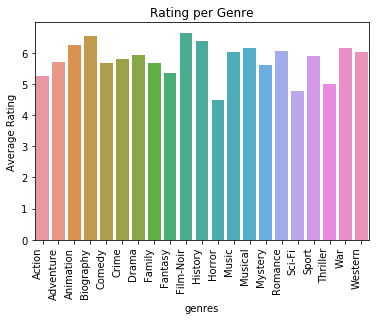

In [45]:
g = sns.barplot(data=metrics_per_genre, x= "genres", y = "avg_vote")
g.set_xticklabels(g.get_xticklabels(), 
                          rotation=90, 
                          horizontalalignment='right')
g.set_ylabel("Average Rating")
g.set_title("Rating per Genre");

In [46]:
avg_per_director = (
    movies_usa.assign(directors=movies_usa["director"].str.split(","))
    .explode("directors")
    .groupby("directors", as_index=False)["avg_vote"].mean()
)
count_per_director = (
    movies_usa.assign(directors=movies_usa["director"].str.split(","))
    .explode("directors")
    .groupby("directors", as_index=False)["title"].count()
)

metrics_dir = pd.concat([avg_per_director, count_per_director["title"]], axis = 1)
#metrics_dir = metrics_per_genre[metrics_per_genre["title"] != 1]
metrics_dir.rename({"title":"count"}, axis = 1, inplace = True)
metrics_dir = metrics_dir.sort_values("avg_vote", axis = 0, ascending=False)
metrics_dir = metrics_dir[metrics_dir["count"] >= 5]
metrics_dir

,directors,avg_vote,count
10339,Quentin Tarantino,7.811111,9
3179,Charles Chaplin,7.666667,15
4075,David Fincher,7.625000,8
2580,Billy Wilder,7.580952,21
670,Joe Russo,7.580000,5
2201,Anthony Russo,7.580000,5
4486,Don Tjernagel,7.560000,5
8769,Martin Scorsese,7.544444,18
1868,Alfred Hitchcock,7.530769,26
10065,Paul Thomas Anderson,7.500000,7


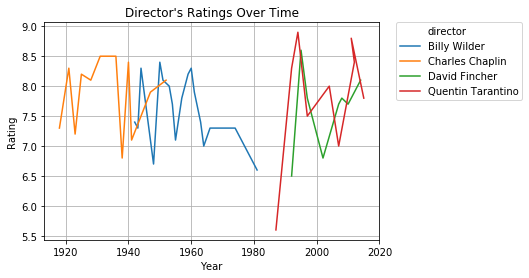

In [47]:
top5 = metrics_dir["directors"].values.tolist()
top5 = top5[0:4] 
movies_small = movies_usa[movies_usa["director"].isin(top5)]

table = pd.pivot_table(movies_small, index = ["director", "year"], values = ["avg_vote"])
g = sns.lineplot(data=table.reset_index(), x = "year", y = "avg_vote", hue = "director")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.grid()
g.set(xlabel='Year', ylabel='Rating')
g.set_title("Director's Ratings Over Time");

Convert to date time

In [48]:
movies_usa['date_published'] = pd.to_datetime(movies_usa['date_published'], format='%Y-%m-%d', errors = 'coerce' )
movies_usa.dtypes

imdb_title_id                       object
title                               object
original_title                      object
year                                object
date_published              datetime64[ns]
genre                               object
director                            object
avg_vote                           float64
votes                                int64
budget                              object
males_allages_avg_vote             float64
males_allages_votes                float64
females_allages_avg_vote           float64
females_allages_votes              float64
Action                               int64
Adventure                            int64
Animation                            int64
Biography                            int64
Comedy                               int64
Crime                                int64
Documentary                          int64
Drama                                int64
Family                               int64
Fantasy    

In [49]:
def convert_budget(row):
    if pd.isnull(row['budget']):
        return np.nan
    year = row['year'] if isinstance(row['year'], int) else  int(re.search(r'[0-9]{4}',row['year']).group(0))
    
    if not year in range(1913,2019) :
        return np.nan
    
    if '$' in row['budget']:
        budget = int(row['budget'].replace('$', ''))
        return cpi.inflate(budget, year)
    else:
        return np.nan


In [50]:
movies_usa['adjusted_budget'] = movies_usa.apply(convert_budget, axis = 1)

In [84]:
movies_reg = movies_usa[["avg_vote", "adjusted_budget"]]
movies_reg = movies_reg[movies_reg["adjusted_budget"].notna()]
movies_reg = movies_reg[movies_reg["adjusted_budget"] != 0]


In [87]:
movies_reg.adjusted_budget.min()

3.0

In [89]:
movies_usa[movies_usa.adjusted_budget <= 10000]

,imdb_title_id,title,original_title,year,date_published,genre,director,avg_vote,votes,budget,males_allages_avg_vote,males_allages_votes,females_allages_avg_vote,females_allages_votes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,adjusted_budget
10682,tt0054861,The Exiles,The Exiles,1961,1961-07-13,Drama,Kent Mackenzie,6.7,988,$ 539,6.7,752.0,6.3,78.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4526.644582
10694,tt0054880,Flaming Creatures,Flaming Creatures,1963,1963-04-29,"Comedy,Drama,Horror",Jack Smith,4.8,1257,$ 300,4.7,968.0,4.8,111.0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2461.833333
10952,tt0055580,V.D.,V.D.,1961,1961-01-01,Drama,H. Haile Chace,5.5,137,$ 1000,5.4,97.0,5.1,15.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8398.227425
11767,tt0057899,The Brig,The Brig,1964,1964-09-20,Drama,"Jonas Mekas, Judith Malina",7.1,235,$ 1200,7.0,174.0,7.4,16.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9720.270968
12212,tt0059181,Firelight,Firelight,1964,1964-03-24,"Sci-Fi,Thriller",Steven Spielberg,5.7,314,$ 400,5.7,213.0,6.5,20.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,3240.090323
13182,tt0062016,My Hustler,My Hustler,1965,1965-10-01,Drama,"Andy Warhol, Chuck Wein",5.8,260,$ 500,5.8,181.0,6.0,14.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3985.825397
14843,tt0066846,Blood Shack,Blood Shack,1971,1971-01-01,Horror,Ray Dennis Steckler,2.7,424,$ 500,2.6,311.0,2.6,33.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,3100.086420
18035,tt0076216,It's Murder!,It's Murder!,1977,1977-01-01,"Comedy,Crime,Horror",Sam Raimi,5.9,195,$ 2000,5.9,125.0,5.0,10.0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8287.359736
18062,tt0076295,The Last House on Dead End Street,The Last House on Dead End Street,1973,1977-05-06,Horror,Roger Watkins,5.3,1819,$ 1500,5.4,1313.0,4.9,126.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,8483.344595
22155,tt0089823,A Polish Vampire in Burbank,A Polish Vampire in Burbank,1983,1983-10-31,"Comedy,Horror",Mark Pirro,4.9,252,$ 3000,4.9,148.0,5.0,26.0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7563.463855


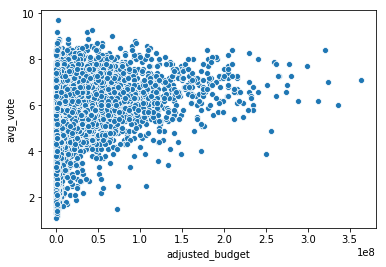

In [90]:
sns.scatterplot(data=movies_reg, x="adjusted_budget", y = "avg_vote")

In [101]:
top_movies = movies_usa.groupby("year")
top_movies= top_movies.apply(lambda x: x.sort_values(["avg_vote"], ascending=False))
top_movies=top_movies.reset_index(drop=True)
top_movies = top_movies.groupby("year").head(1)
top_movies = top_movies[top_movies.adjusted_budget.notna()][["year","avg_vote", "adjusted_budget"]]
top_movies

,year,avg_vote,adjusted_budget
3,1913,6.0,1.445768e+05
35,1916,7.8,8.890271e+06
91,1919,7.3,1.277307e+06
120,1920,7.4,8.788745e+06
150,1921,8.3,3.507081e+06
177,1922,7.2,2.242027e+07
207,1923,8.1,1.776839e+06
263,1925,8.2,1.324410e+07
310,1926,8.1,1.064013e+07
364,1927,8.1,2.886287e+06


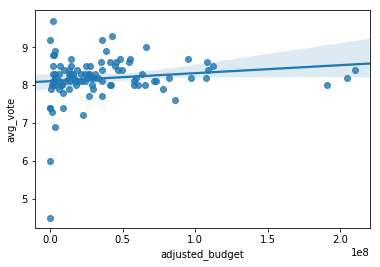

In [103]:
sns.regplot(data=top_movies, x = "adjusted_budget", y = "avg_vote")

In [24]:
print(str(movies_usa.isna().sum()))

imdb_title_id                   0
title                           0
original_title                  0
year                            0
date_published                  1
genre                           0
director                       34
avg_vote                        0
votes                           0
budget                      18023
males_allages_avg_vote          1
males_allages_votes             1
females_allages_avg_vote        7
females_allages_votes           7
Action                          0
Adventure                       0
Animation                       0
Biography                       0
Comedy                          0
Crime                           0
Documentary                     0
Drama                           0
Family                          0
Fantasy                         0
Film-Noir                       0
History                         0
Horror                          0
Music                           0
Musical                         0
Mystery       

In [104]:
movies_reg["avg_vote"].corr(movies_reg["adjusted_budget"])

0.28719018642034677